In [1]:
#Convolutional Neural Networks (CNNs)

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

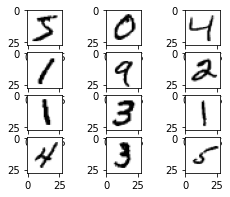

In [7]:
plt.figure(figsize=(4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [15]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [16]:
model.compile(
    optimizer = 'Adam',
    loss = "categorical_crossentropy",
    metrics = ['accuracy']

)

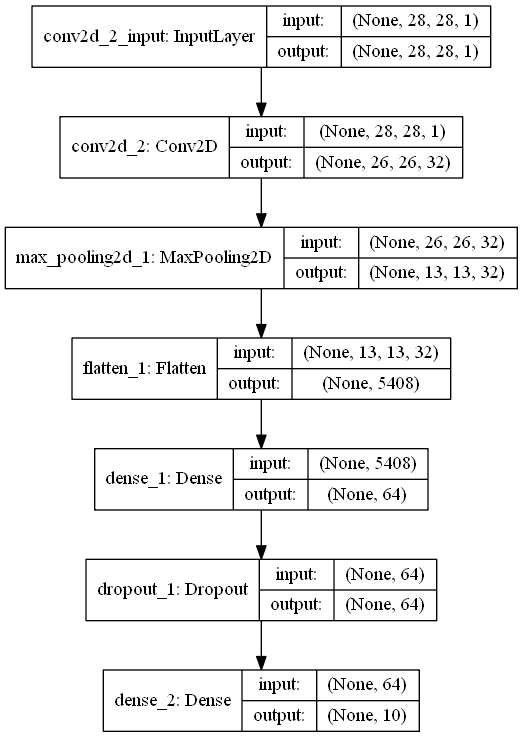

In [17]:
tf.keras.utils.plot_model(model, "vbu-mnist.png", show_shapes = True, show_layer_names = True)

In [20]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 49s - loss: 0.3462 - accuracy: 0.8937 - val_loss: 0.1226 - val_accuracy: 0.9649
Epoch 2/5
 - 37s - loss: 0.1801 - accuracy: 0.9458 - val_loss: 0.0831 - val_accuracy: 0.9766
Epoch 3/5
 - 37s - loss: 0.1407 - accuracy: 0.9557 - val_loss: 0.0780 - val_accuracy: 0.9801
Epoch 4/5
 - 37s - loss: 0.1169 - accuracy: 0.9634 - val_loss: 0.0757 - val_accuracy: 0.9788
Epoch 5/5
 - 37s - loss: 0.1002 - accuracy: 0.9681 - val_loss: 0.0683 - val_accuracy: 0.9814


In [ ]:
#accuracy, val_accuracy - loss, val_loss - model.evaluate